### tensorflow의 keras 임포트 진행

In [1]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()

### 전달받은 데이터의 크기 확인
- 훈련 input 데이터: 60,000개의 이미지로 구성
- 훈련 input 데이터: 28 x 28 크기로 구성
- 훈련 타깃데이터: 원소가 있는 1차원 배열
- 테스트 input 데이터: 10,000개의 이미지로 구성
- 테스트 input 데이터: 28 x 28 크기로 구성
- 테스트 타깃데이터: 원소가 있는 1차원 배열

In [2]:
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


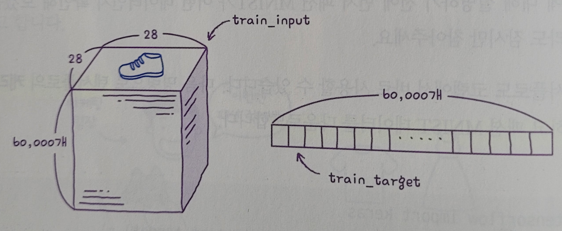 

### 훈련데이터에서 몇개의 데이터 출력

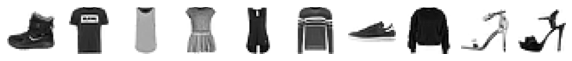

In [3]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [4]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [5]:
import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64))


### 0 ~ 9까지 레이블마다 6000개의 데이터가 들어있음.

-------

## 로지스틱 회귀로 패션 아이템 분류하기
- 훈련 샘플이 60,000개 이기에 전체 데이터를 한꺼번에 사용하여 모델을 훈련하는 것은 무리가 있음
- 그래서 샘플을 하나씩 꺼내서 모델을 훈련하는 방법이 더 효율적으로 보임.
- 이러한 방법 [확률적 경사 하강법: SGDClassifier]

#### SGDClassifier
- 사용 시, 표준화 전처리된 데이터를 사용
- 확률적 경사 하강법은 여러 특성 중 기울기가 가장 가파른 방향을 따라 이동
- 만약 특성마다 값의 범위가 많이 다르면 올바르게 손실 함수의 경사를 내려갈 수 없음.

#### 패션 MNIST의 경우 각 픽셀은 0~255 사이의 정수값
- 해당 경우, 보통 255로 나누어 0~1사이의 값으로 정규화 진행

#### 2차원 배열인 각 샘플을 1차원 배열로 펼치는 작업 진행 ==> reshape()
- SGDClassifier는 2차원 입력을 다루지 못하기 때문에 1차원 배열로 변경

In [6]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

## 28 x 28의 2차원 배열을 1차월 배열로 변경.
print(train_scaled.shape)

(60000, 784)


### SGDClassifier로 성능확인하기.

In [7]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier(loss='log', max_iter=5, random_state=42)
scores = cross_validate(sgdc, train_scaled, train_target, return_train_score=True, n_jobs=-1)

print('Train R^2:', np.round_(np.mean(scores['train_score']), 3))
print('Train_validation R^2:', np.round_(np.mean(scores['test_score']), 3))

Train R^2: 0.831
Train_validation R^2: 0.819


#### 반복횟수(max_iter)를 변경하여 성능 향상 확인하기.

In [8]:
sgdc = SGDClassifier(loss='log', max_iter=9, random_state=42)
scores = cross_validate(sgdc, train_scaled, train_target, return_train_score=True, n_jobs=-1)

print('Train R^2:', np.round_(np.mean(scores['train_score']), 3))
print('Train_validation R^2:', np.round_(np.mean(scores['test_score']), 3))

Train R^2: 0.844
Train_validation R^2: 0.831


In [9]:
sgdc = SGDClassifier(loss='log', max_iter=20, random_state=42)
scores = cross_validate(sgdc, train_scaled, train_target, return_train_score=True, n_jobs=-1)

print('Train R^2:', np.round_(np.mean(scores['train_score']), 3))
print('Train_validation R^2:', np.round_(np.mean(scores['test_score']), 3))

Train R^2: 0.857
Train_validation R^2: 0.844


In [10]:
sgdc = SGDClassifier(loss='log', max_iter=30, random_state=42)
scores = cross_validate(sgdc, train_scaled, train_target, return_train_score=True, n_jobs=-1)

print('Train R^2:', np.round_(np.mean(scores['train_score']), 3))
print('Train_validation R^2:', np.round_(np.mean(scores['test_score']), 3))

Train R^2: 0.857
Train_validation R^2: 0.843


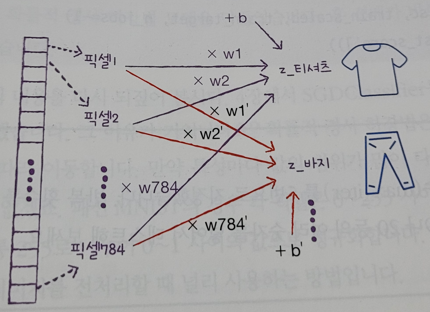

#### 반복횟수(max_iter)를 변경하여도 성능향상은 크게 없다.